In [ ]:
import os
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Remove coruupted images

Since I downloaded data from the web, some of them could get corrupted and python could not read them, so we need to make sure every image is downloaded correctly

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = '/content/drive/MyDrive/Image_Classification_Happy_sad/Data'

In [ ]:
len(os.listdir(os.path.join(data_dir,'Happy_people')))

131

In [ ]:
img_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [ ]:
img_exts

['jpeg', 'jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path =os.path.join(data_dir,image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in img_exts:
        print('Image is not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))



Image is not in ext list /content/drive/MyDrive/Image_Classification_Happy_sad/Data/Sad_people/smQxqvj.jpeg
Image is not in ext list /content/drive/MyDrive/Image_Classification_Happy_sad/Data/Sad_people/article-2029228-01C3E98B000004B0-620_233x423.jpg
Image is not in ext list /content/drive/MyDrive/Image_Classification_Happy_sad/Data/Sad_people/depositphotos_2444604-stock-photo-very-sad-little-boy.jpg
Image is not in ext list /content/drive/MyDrive/Image_Classification_Happy_sad/Data/Sad_people/sad-face-pictures-1920-x-1080-s3se61fgdr80r29r.jpg
Image is not in ext list /content/drive/MyDrive/Image_Classification_Happy_sad/Data/Sad_people/closeup-poor-staring-hungry-orphan-260nw-1102673192.jpg
Image is not in ext list /content/drive/MyDrive/Image_Classification_Happy_sad/Data/Sad_people/portrait-sad-man-600nw-126009806.jpg
Image is not in ext list /content/drive/MyDrive/Image_Classification_Happy_sad/Data/Sad_people/depositphotos_94933778-stock-photo-her-sad-face.jpg
Image is not in ext

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 313 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
batch

(array([[[[ 59.        ,  54.        ,  75.92578   ],
          [ 59.        ,  54.        ,  74.        ],
          [ 59.        ,  54.185547  ,  73.25781   ],
          ...,
          [217.6289    , 235.        , 229.        ],
          [218.        , 235.        , 229.        ],
          [218.        , 235.        , 229.        ]],
 
         [[ 59.        ,  54.        ,  75.92578   ],
          [ 59.        ,  54.06371   ,  73.87258   ],
          [ 59.        ,  54.65163   ,  72.325645  ],
          ...,
          [217.6289    , 235.        , 229.        ],
          [218.        , 235.        , 229.        ],
          [218.        , 235.        , 229.        ]],
 
         [[ 59.        ,  54.        ,  75.37287   ],
          [ 59.        ,  54.11133   ,  73.71342   ],
          [ 59.        ,  55.        ,  71.107956  ],
          ...,
          [217.3418    , 234.47905   , 229.28711   ],
          [217.71289   , 234.42578   , 229.28711   ],
          [217.71289   , 234.42

In [ ]:
batch[0].shape

(32, 256, 256, 3)

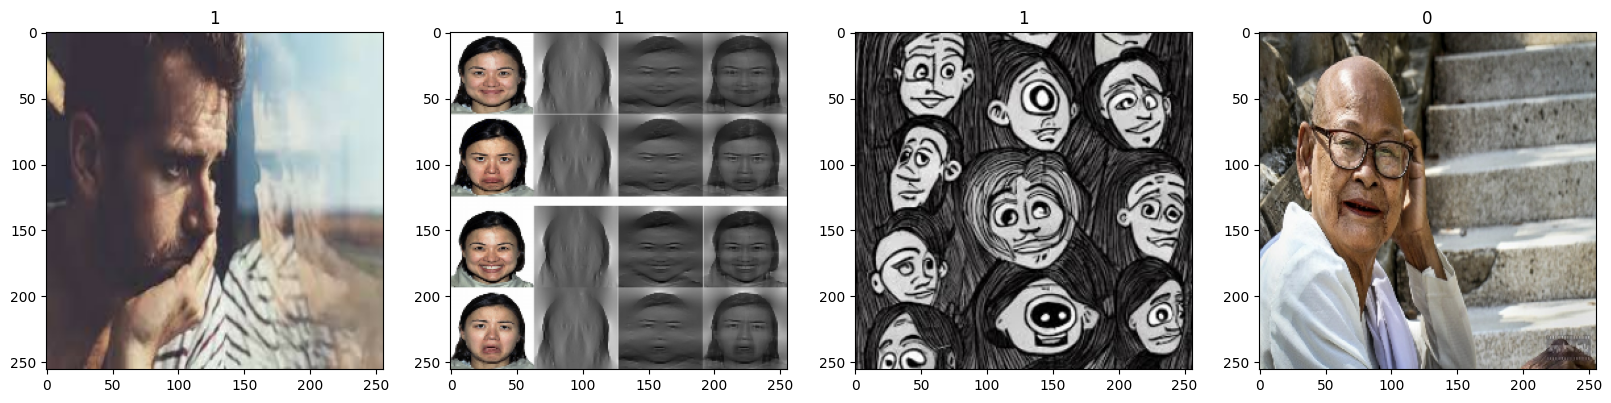

In [ ]:
fig, ax = plt.subplots(ncols =4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
batch[0].max()

255.0

# Preprocess

so here the 1 flag == sad
            0 flag == happy

# Scale data

In [ ]:
data = data.map(lambda x, y: (x/255, y))

In [ ]:
scaled_iter = data.as_numpy_iterator()

In [ ]:
batch = scaled_iter.next()

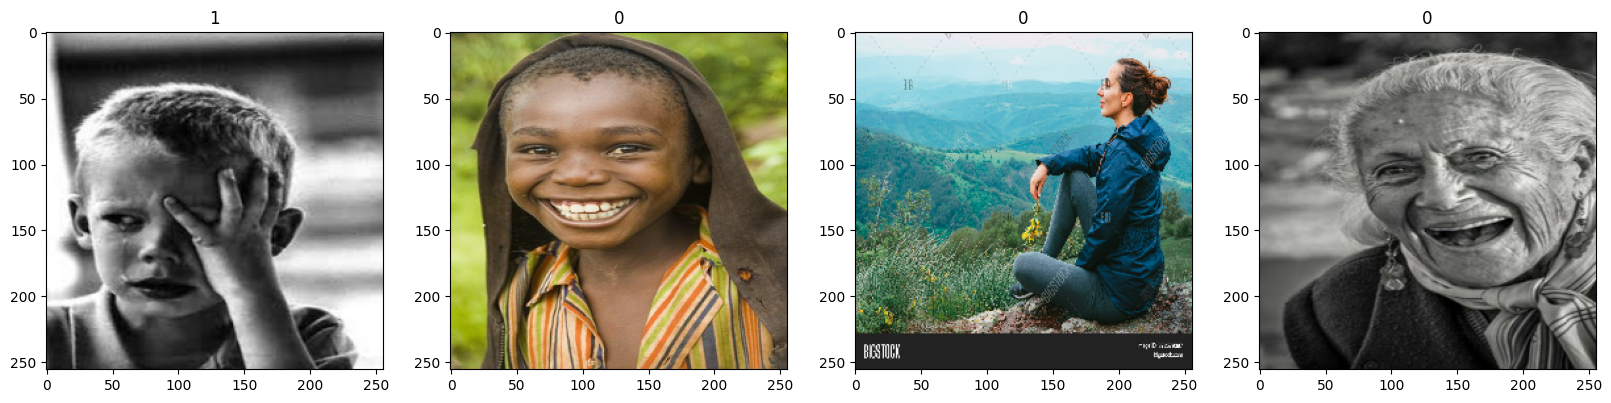

In [ ]:
fig, ax = plt.subplots(ncols =4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

split data

In [ ]:
len(data)

10

In [ ]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)

In [ ]:
train_size

7

In [ ]:
val_size + train_size + test_size

10

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
len(train)

7

# Building the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape =(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation ='relu'))
model.add(Dense(1, activation ='sigmoid'))

In [ ]:
model.compile(optimizer ='adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'] )

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [ ]:
logdir = '/content/drive/MyDrive/Image_Classification_Happy_sad/logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [ ]:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback] )

Epoch 1/20
7/7 [==============================] - 22s 2s/step - loss: 0.7874 - accuracy: 0.4688 - val_loss: 0.6902 - val_accuracy: 0.6250
Epoch 2/20
7/7 [==============================] - 20s 2s/step - loss: 0.6859 - accuracy: 0.5893 - val_loss: 0.6704 - val_accuracy: 0.5781
Epoch 3/20
7/7 [==============================] - 18s 2s/step - loss: 0.6514 - accuracy: 0.6116 - val_loss: 0.5533 - val_accuracy: 0.6719
Epoch 4/20
7/7 [==============================] - 18s 2s/step - loss: 0.6320 - accuracy: 0.6071 - val_loss: 0.5981 - val_accuracy: 0.7500
Epoch 5/20
7/7 [==============================] - 19s 2s/step - loss: 0.5480 - accuracy: 0.7812 - val_loss: 0.5409 - val_accuracy: 0.7500
Epoch 6/20
7/7 [==============================] - 19s 2s/step - loss: 0.4815 - accuracy: 0.8170 - val_loss: 0.4200 - val_accuracy: 0.8281
Epoch 7/20
7/7 [==============================] - 19s 2s/step - loss: 0.4693 - accuracy: 0.8170 - val_loss: 0.3232 - val_accuracy: 0.9531
Epoch 8/20
7/7 [==================

# Plot Performance

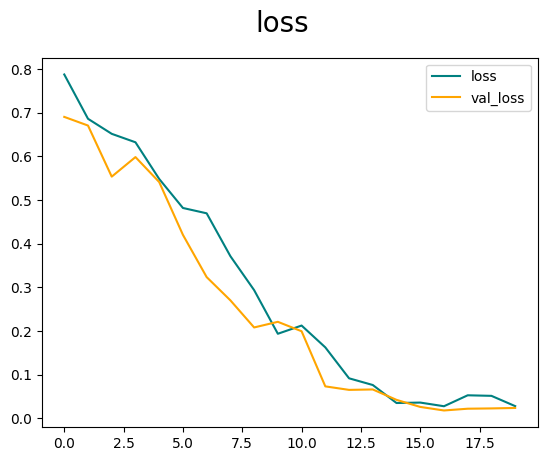

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color ='teal', label ='loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('loss', fontsize= 20)
plt.legend(loc = 'upper right')
plt.show()

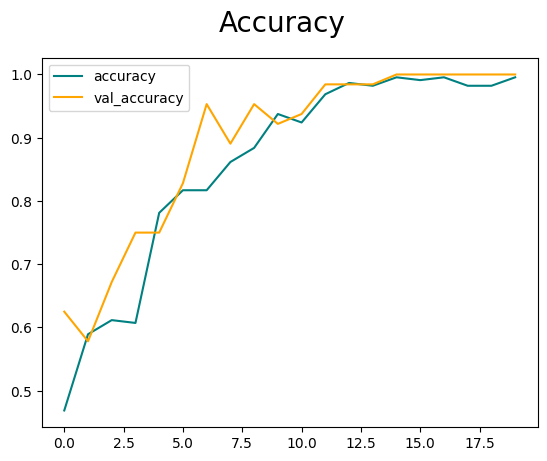

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize= 20)
plt.legend(loc='upper left')
plt.show()

# Testing Model and Evaluate Performance

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
biacc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y,yhat)
  biacc.update_state(y,yhat)

1/1 [==============================] - 0s 486ms/step


In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {biacc.result().numpy()}')

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


# Test

In [ ]:
import cv2

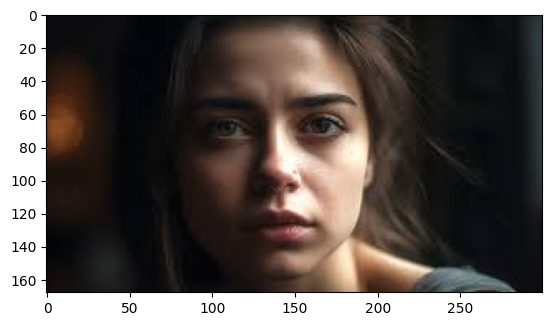

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Image_Classification_Happy_sad/sadtest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

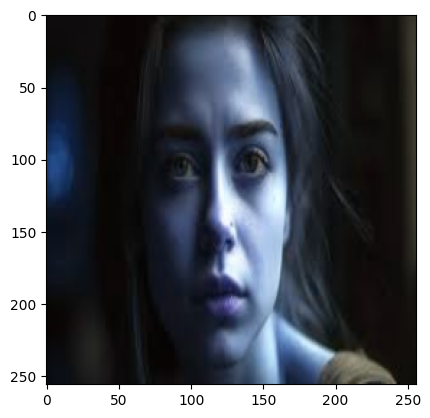

In [ ]:
resize =tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 34ms/step


In [ ]:
yhat

array([[0.99946237]], dtype=float32)

In [ ]:
if yhat> 0.5:
  print(f'predicted class is Sad')
else:
  print(f'Predicted class is Happy')

predicted class is Sad
